In [1]:
# Intialising Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
## Loading the dataset
df = pd.read_csv('project1_df.csv')
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [3]:
# Visualising the size of the dataset
df.shape

(55000, 13)

In [4]:
# Visualising the columns of the dataset
df.keys()

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

In [5]:
# Checking the data types of the columns
df.dtypes

CID                        int64
TID                        int64
Gender                    object
Age Group                 object
Purchase Date             object
Product Category          object
Discount Availed          object
Discount Name             object
Discount Amount (INR)    float64
Gross Amount             float64
Net Amount               float64
Purchase Method           object
Location                  object
dtype: object

In [6]:
# Checking for Null Values
df.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [15]:
df_null = df[(df['Discount Availed'] == 'No') & (df['Discount Name'].isna())]

null_col = ['Discount Availed', 'Discount Name']

for col in null_col:
    print(f'--- {col} ---')
    print(df_null[col].describe())
    print('---')

print(df_null.shape)



--- Discount Availed ---
count     27585
unique        1
top          No
freq      27585
Name: Discount Availed, dtype: object
---
--- Discount Name ---
count       0
unique      0
top       NaN
freq      NaN
Name: Discount Name, dtype: object
---
(27585, 13)


The attribute **'Discount Name'** contains 27,585 missing values. **'Discount Availed'** column shows that every transaction is labeled as **'No'**. This suggests that no discounts were applied to any orders in the dataset

# Dealing with Null Values, Column Names and Formating Date

In [24]:
# Filling the missing values for the attribute 'Discount Name'
df['Discount Name'].fillna('No Discount', inplace=True)

df.isnull().sum()

C:\Users\alxab\AppData\Local\Temp\ipykernel_8364\725866710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Name'].fillna('No Discount', inplace=True)


CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64

In [25]:
# Renaming the columns 'CID' and 'PID' to 'Customer ID' and 'Payment ID'

df.rename(columns=
          {
                'CID': 'Customer ID',
                'TID': 'Transaction ID',
                'Gross Amount': 'Gross Amount (INR)',
                'Net Amount': 'Net Amount (INR)'
            }, inplace=True)
df.head(5)

,Customer ID,Transaction ID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount (INR),Net Amount (INR),Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [27]:
# Removing captialisation from the column names
df.columns = df.columns.str.lower()
df.keys()

Index(['customer id', 'transaction id', 'gender', 'age group', 'purchase date',
       'product category', 'discount availed', 'discount name',
       'discount amount (inr)', 'gross amount (inr)', 'net amount (inr)',
       'purchase method', 'location'],
      dtype='object')

In [30]:
# Formatting the purchase date to datetime

df['purchase date'] = pd.to_datetime(df['purchase date'])

# Extracting the Date
df['transaction date'] = df['purchase date'].dt.date

# Extracting the Time
df['transaction time'] = df['purchase date'].dt.time

df.keys()

C:\Users\alxab\AppData\Local\Temp\ipykernel_8364\3201180348.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['purchase date'] = pd.to_datetime(df['purchase date'])


Index(['customer id', 'transaction id', 'gender', 'age group', 'purchase date',
       'product category', 'discount availed', 'discount name',
       'discount amount (inr)', 'gross amount (inr)', 'net amount (inr)',
       'purchase method', 'location', 'transaction date', 'transaction time'],
      dtype='object')

# Basic Attributes

In [31]:
df['gender'].describe()

count      55000
unique         3
top       Female
freq       18454
Name: gender, dtype: object

In [32]:
df['gender'].value_counts()

gender
Female    18454
Other     18450
Male      18096
Name: count, dtype: int64

In [33]:
df['age group'].describe()

count     55000
unique        5
top       25-45
freq      22010
Name: age group, dtype: object

In [34]:
df['age group'].value_counts()

age group
25-45           22010
18-25           16431
45-60           11104
under 18         2771
60 and above     2684
Name: count, dtype: int64

In [35]:
df['product category'].describe()

count           55000
unique              9
top       Electronics
freq            16574
Name: product category, dtype: object

In [36]:
df['product category'].value_counts()

product category
Electronics          16574
Clothing             10968
Beauty and Health     8332
Sports & Fitness      5557
Home & Kitchen        5489
Books                 2762
Other                 2171
Pet Care              1618
Toys & Games          1529
Name: count, dtype: int64

In [37]:
df['discount availed'].describe()

count     55000
unique        2
top          No
freq      27585
Name: discount availed, dtype: object

In [38]:
df['discount availed'].value_counts()

discount availed
No     27585
Yes    27415
Name: count, dtype: int64

In [39]:
df['discount name'].describe()

count           55000
unique              6
top       No Discount
freq            27585
Name: discount name, dtype: object

In [40]:
df['discount name'].value_counts()

discount name
No Discount        27585
NEWYEARS            8135
SEASONALOFFER21     6940
FESTIVE50           4115
SAVE10              4115
WELCOME5            4110
Name: count, dtype: int64

In [48]:
df['location'].describe()

count      55000
unique        14
top       Mumbai
freq       11197
Name: location, dtype: object

In [49]:
df['location'].value_counts()

location
Mumbai       11197
Delhi        10799
Bangalore     8249
Hyderabad     5545
Chennai       4368
Pune          3781
Ahmedabad     2785
Kolkata       2709
Jaipur        1678
Lucknow       1136
Other         1046
Varanasi       606
Dehradun       553
Srinagar       548
Name: count, dtype: int64

In [50]:
df['purchase method'].describe()

count           55000
unique              8
top       Credit Card
freq            22096
Name: purchase method, dtype: object

In [51]:
df['purchase method'].value_counts()

purchase method
Credit Card           22096
Debit Card            13809
Net Banking            5485
International Card     2815
Cash on Delivery       2768
PhonePe UPI            2683
Paytm UPI              2674
Google Pay UPI         2670
Name: count, dtype: int64

In [42]:
# Describing the 'discount amount','gross amount', and 'net amount' columns

float_col = ['discount amount (inr)', 'gross amount (inr)', 'net amount (inr)']

for col in float_col:
    print(f'--- {col} ---')
    print(df[col].describe().round(2))
    print('\n')

--- discount amount (inr) ---
count    55000.00
mean       136.99
std        165.38
min          0.00
25%          0.00
50%          0.00
75%        274.12
max        500.00
Name: discount amount (inr), dtype: float64


--- gross amount (inr) ---
count    55000.00
mean      3012.94
std       1718.43
min        136.45
25%       1562.11
50%       2954.27
75%       4342.22
max       8394.83
Name: gross amount (inr), dtype: float64


--- net amount (inr) ---
count    55000.00
mean      2875.95
std       1726.13
min       -351.12
25%       1429.55
50%       2814.91
75%       4211.41
max       8394.83
Name: net amount (inr), dtype: float64




In [44]:
# Describing the 'tranasaction date' and 'purchase date' columns
date_col = ['transaction date', 'transaction time']
for col in date_col:
    print(f'--- {col} ---')
    print(df[col].describe())
    print('\n')

--- transaction date ---
count          55000
unique          1827
top       2020-11-12
freq              48
Name: transaction date, dtype: object


--- transaction time ---
count        55000
unique       40595
top       11:45:29
freq             6
Name: transaction time, dtype: object




# Correlation between Attributes

In [45]:
# Gender vs Discount availed

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['discount availed'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 0.5937259037298792
p-value: 0.743145852136418
Degrees of Freedom: 2
Expected Frequencies:
 [[9255.51981818 9198.48018182]
 [9075.96654545 9020.03345455]
 [9253.51363636 9196.48636364]]


In [46]:
# Age Group vs Product Category

# Create a contingency table
contingency_table1 = pd.crosstab(df['age group'], df['product category'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 31.68517834623762
p-value: 0.48243605840375203
Degrees of Freedom: 32
Expected Frequencies:
 [[2489.14712727  825.13494545 3276.64014545 4951.40716364 1639.8138
   648.57638182  483.37014545 1660.12849091  456.7818    ]
 [3334.31490909 1105.30218182 4389.19418182 6632.61345455 2196.598
   868.79472727  647.49418182 2223.81036364  611.878     ]
 [1682.15505455  557.62269091 2214.33949091 3346.13992727 1108.1792
   438.30516364  326.65949091 1121.90778182  308.6912    ]
 [ 406.6016      134.7856      535.2384      808.8112      267.8632
   105.9448       78.9584      271.1816       74.6152    ]
 [ 419.78130909  139.15458182  552.58778182  835.02825455  276.5458
   109.37892727   81.51778182  279.97176364   77.0338    ]]


In [47]:
# Product Category vs Discount Availed

# Create a contingency table
contingency_table2 = pd.crosstab(df['product category'], df['discount availed'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 9.443407507520682
p-value: 0.3062811774698506
Degrees of Freedom: 8
Expected Frequencies:
 [[4178.87672727 4153.12327273]
 [1385.26854545 1376.73145455]
 [5500.95054545 5467.04945455]
 [8312.61436364 8261.38563636]
 [2752.983      2736.017     ]
 [1088.85518182 1082.14481818]
 [ 811.50054545  806.49945455]
 [2787.08809091 2769.91190909]
 [ 766.863       762.137     ]]


Across all three tests, no significant associations were found between gender, age group, or product category with discount availing behavior. This suggests a **uniform and unbiased discounting policy** across customer demographics and product types.

# Visualisations

Text(0.5, 1.0, 'Location Distribution')

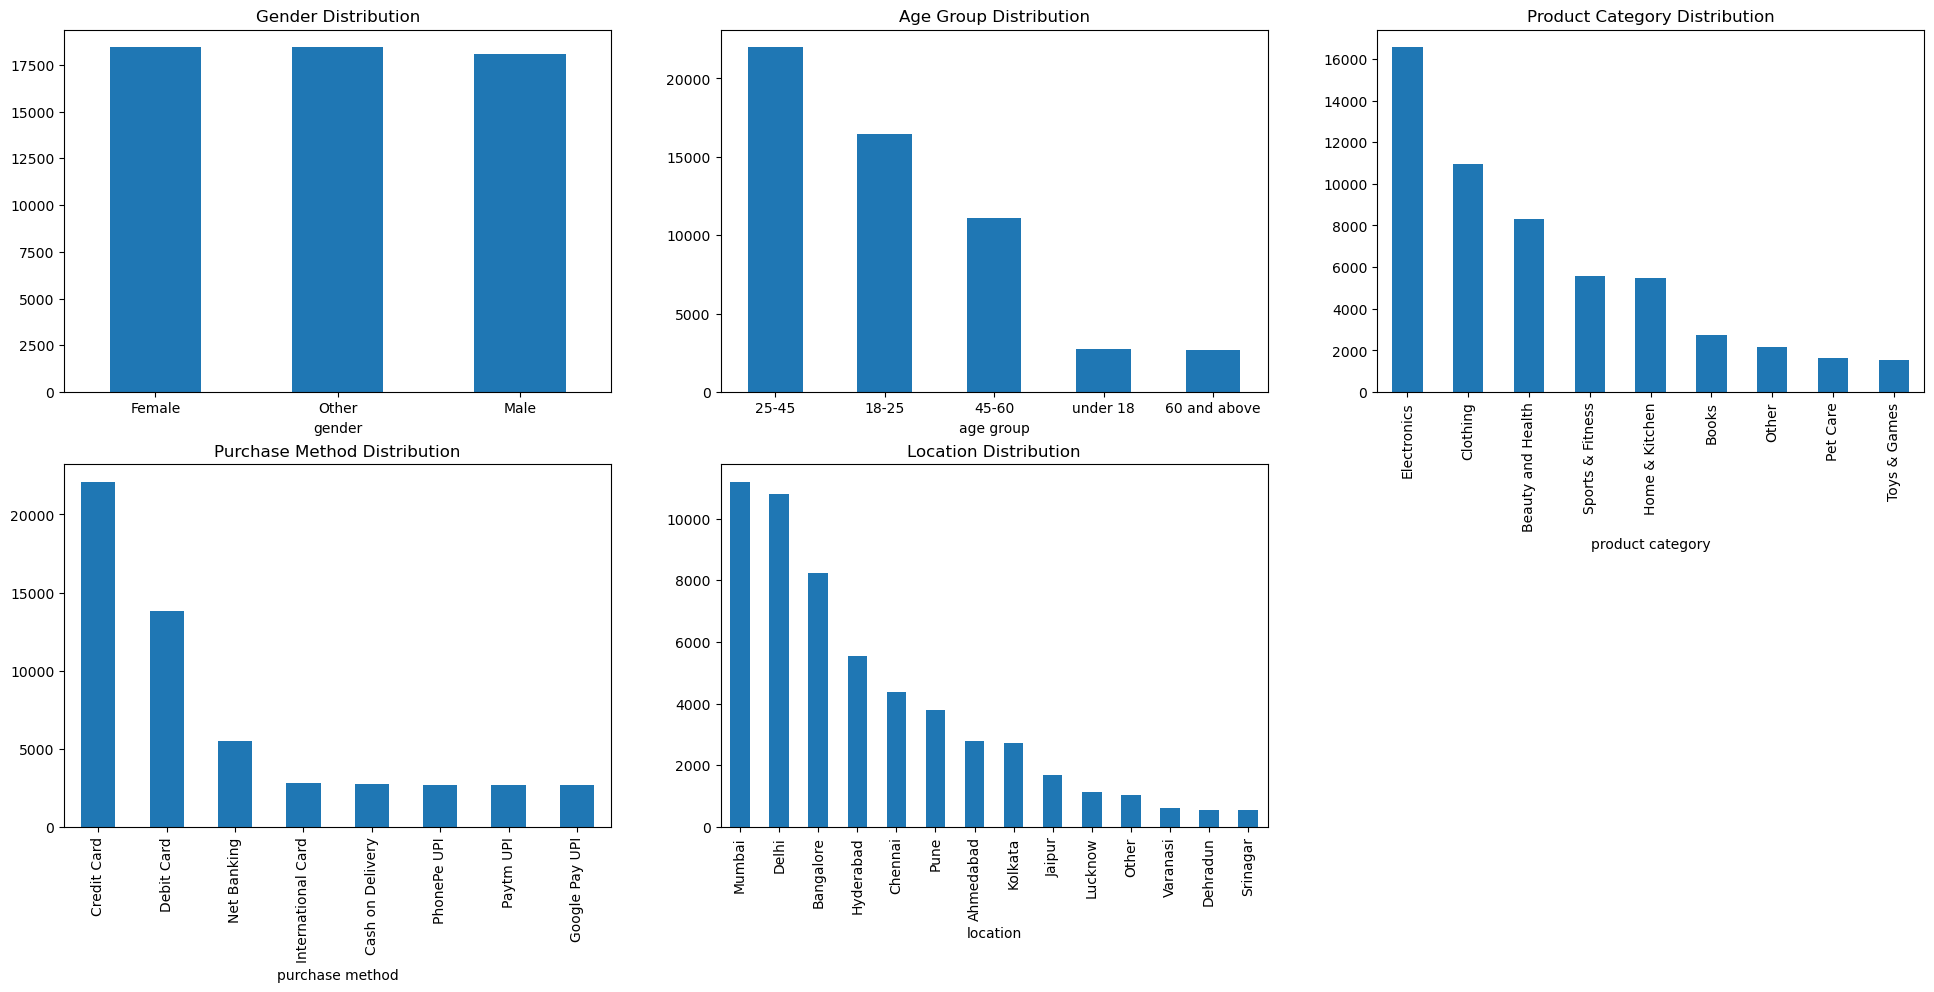

In [81]:
# Distribution of customer and purchases

plt.figure(figsize=(24, 16))

plt.subplot(3, 3, 1)
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks(rotation=360)

plt.subplot(3, 3, 2)
df['age group'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')     
plt.xticks(rotation=360)

plt.subplot(3, 3, 3)
df['product category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')      


plt.subplot(3, 3, 4)
df['purchase method'].value_counts().plot(kind='bar')
plt.title('Purchase Method Distribution')

plt.subplot(3, 3, 5)
df['location'].value_counts().plot(kind='bar')
plt.title('Location Distribution')


The platform’s audience is primarily **young to middle-aged urban adults**, equally distributed by gender, with a strong preference for electronics and digital payment methods. Geographically, **metro cities** dominate, suggesting room for **expansion in smaller cities**.

Text(0.5, 1.0, 'Net Amount Distribution')

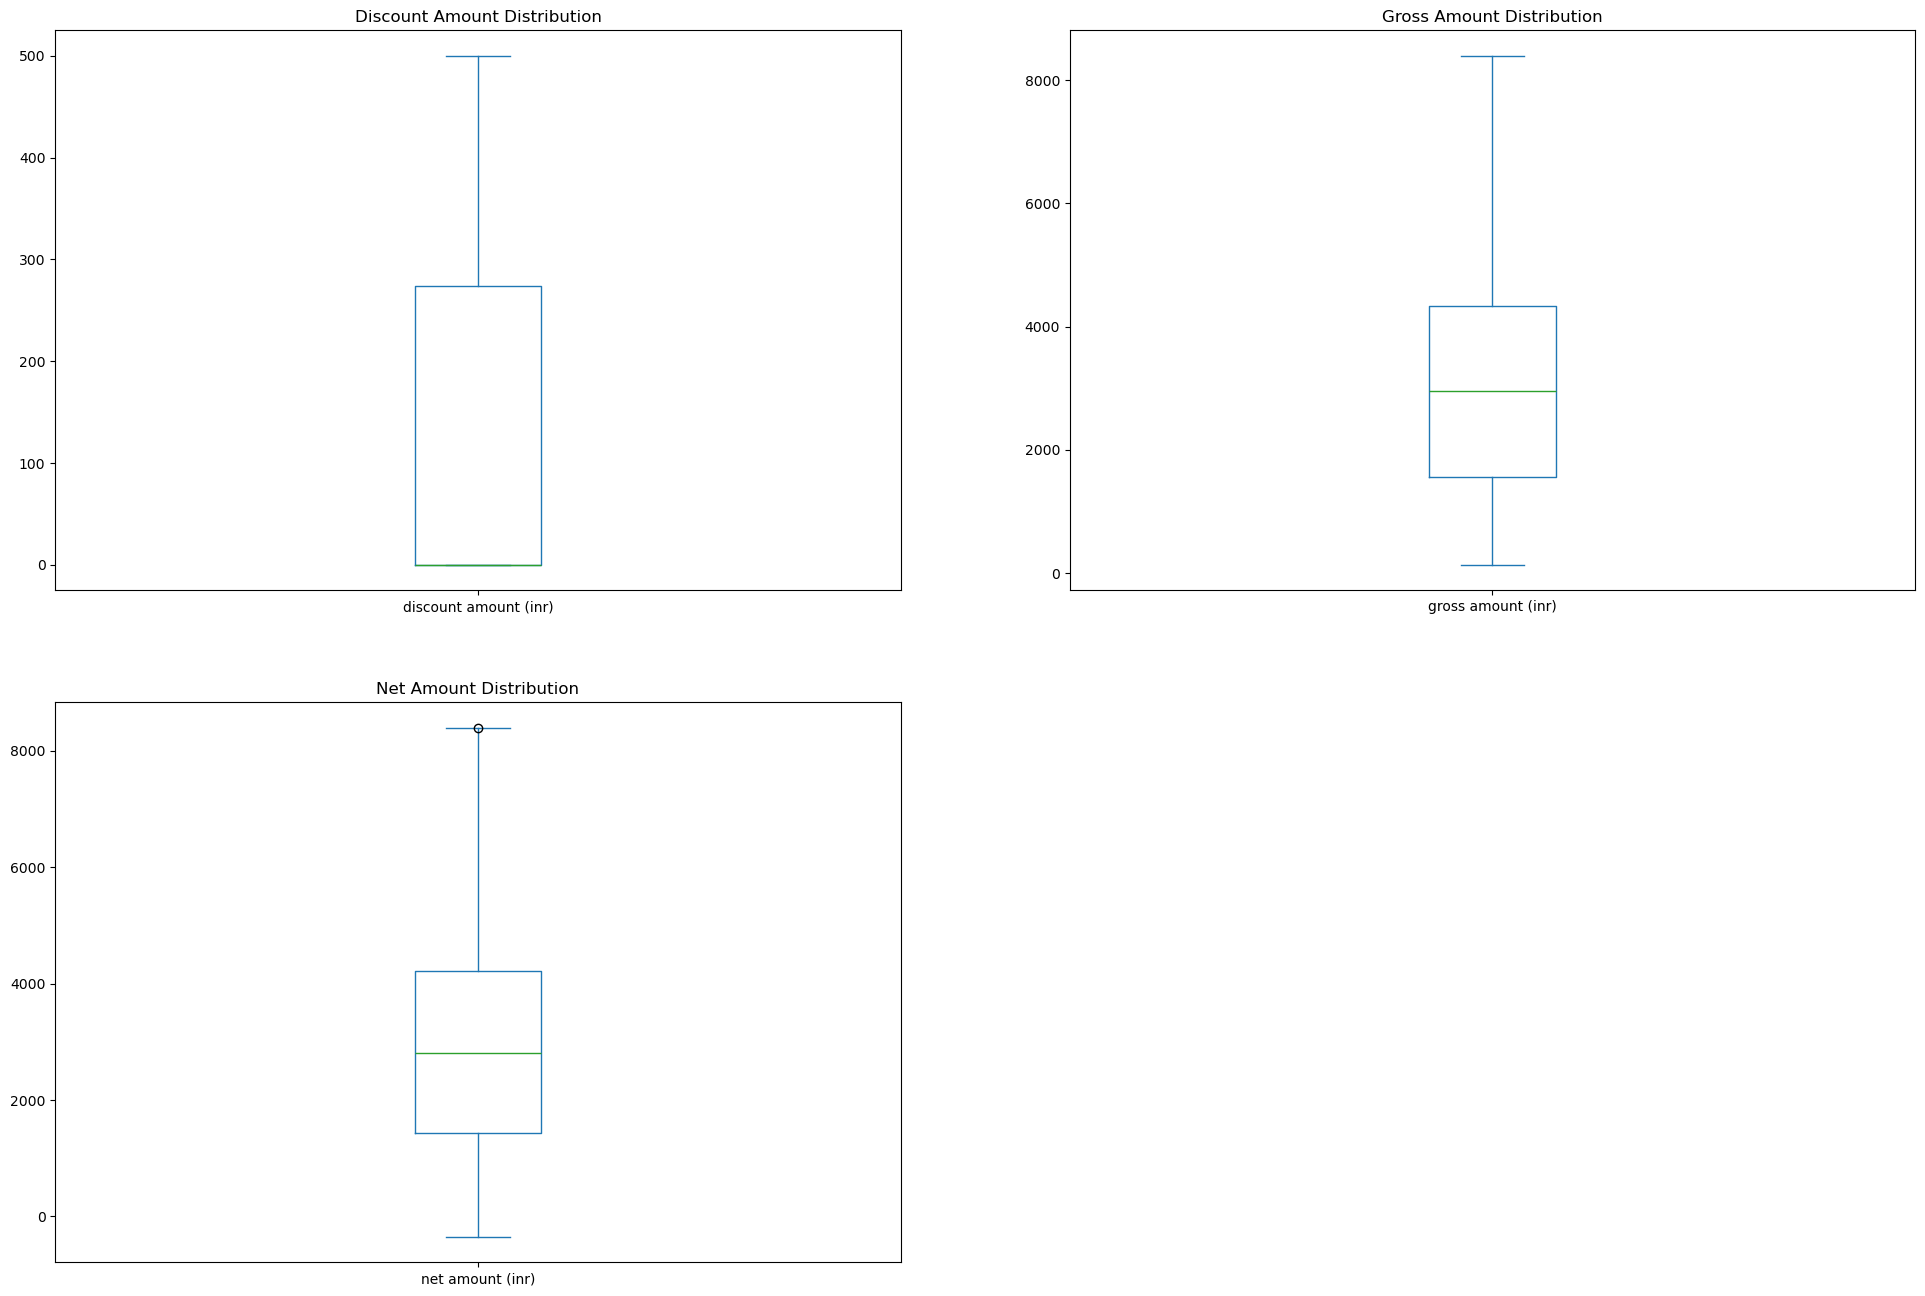

In [83]:
# Distribution of Amounts

plt.figure(figsize=(24, 16))

# Histogram of Discount Amount
plt.subplot(2, 2, 1)
df['discount amount (inr)'].plot(kind='box')
plt.title('Discount Amount Distribution')

plt.subplot(2, 2, 2)
df['gross amount (inr)'].plot(kind='box')     
plt.title('Gross Amount Distribution')

plt.subplot(2, 2, 3)
df['net amount (inr)'].plot(kind='box')
plt.title('Net Amount Distribution')

The platform exhibits **financially healthy transactions**, minimal discount dependency, and a consistent customer willingness to spend, especially in the ₹1,500–₹4,500 range. Discounts are not widely applied — possibly preserving margins.

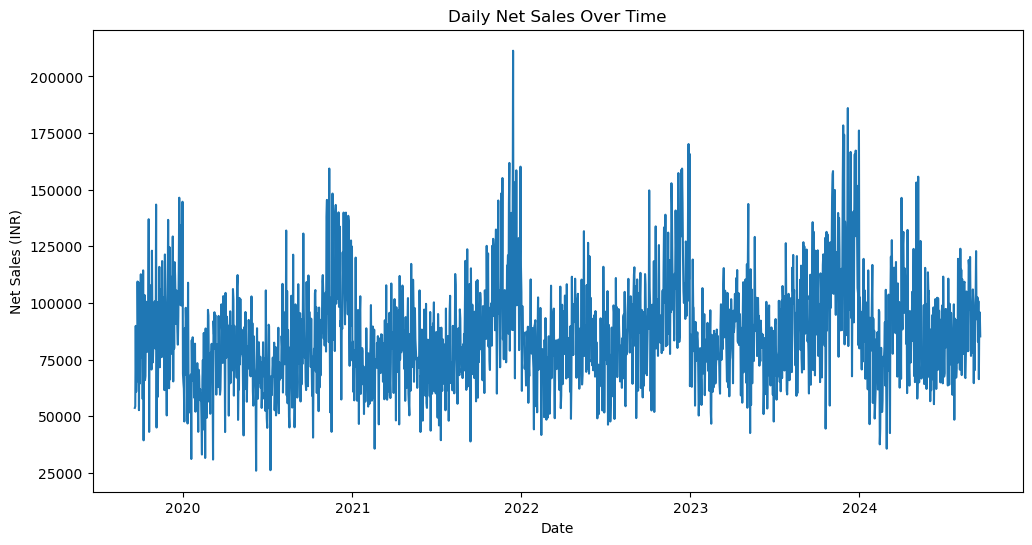

In [84]:
# Time-Series Analysis (Temporal Trends)

df['transaction date'] = pd.to_datetime(df['transaction date'])
daily_sales = df.groupby('transaction date')['net amount (inr)'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction date', y='net amount (inr)', data=daily_sales)
plt.title('Daily Net Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Net Sales (INR)')
plt.show()

Daily net sales are highly volatile with clear seasonal/event-driven peaks, especially in early 2021, 2023, and 2024. While daily fluctuations are significant, the overall sales baseline remains **relatively stable**, though peak values show a slight increase over the observed period.

C:\Users\alxab\AppData\Local\Temp\ipykernel_8364\3590726729.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction hour'] = pd.to_datetime(df['transaction time'].astype(str)).dt.hour


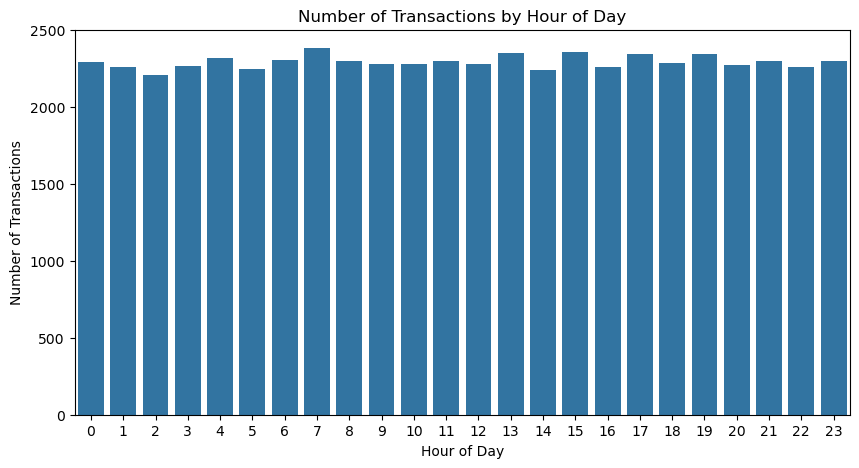

In [85]:
# Hourly Purchase Trends

df['transaction hour'] = pd.to_datetime(df['transaction time'].astype(str)).dt.hour
hourly_counts = df['transaction hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

Transaction volume is remarkably **consistent** across all 24 hours, with no significant hourly peaks or dips, suggesting continuous operations or uniform user engagement.

Text(0, 0.5, 'Count')

<Figure size 2400x1800 with 0 Axes>

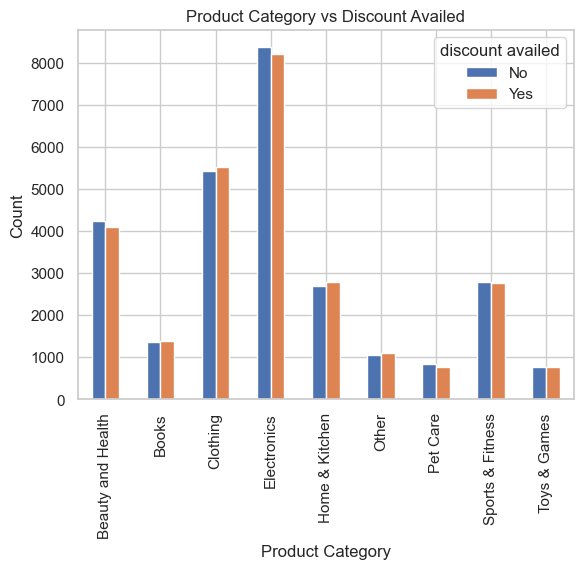

In [92]:
# Product Category vs Discount Availed


v = pd.crosstab(df['product category'], df['discount availed'])

plt.figure(figsize=(24,18))

v.plot(kind='bar')
plt.title('Product Category vs Discount Availed')
plt.xlabel('Product Category')
plt.ylabel('Count')


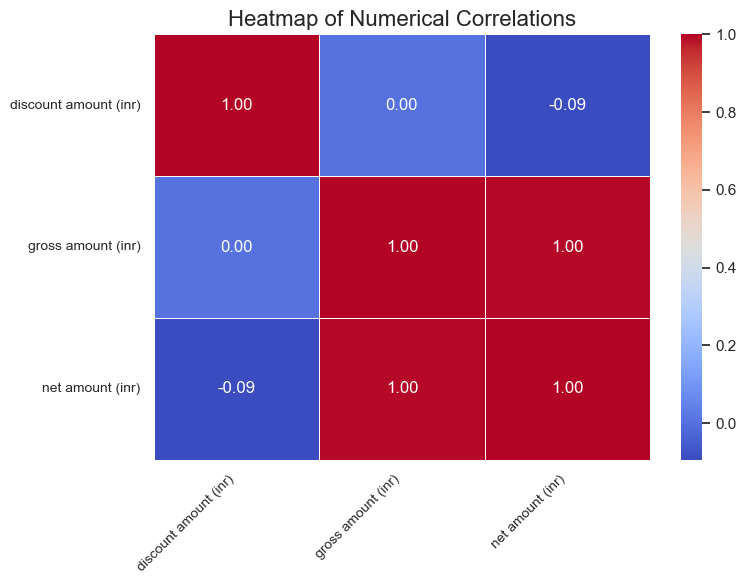

In [93]:
# Correlation Matrix

numerical_cols = ['discount amount (inr)', 'gross amount (inr)', 'net amount (inr)']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix for the selected numerical columns.
# The .corr() method computes pairwise correlation of columns, excluding NA/null values.
correlation_matrix = df_numerical.corr()

# Set up the matplotlib figure size for the heatmap.
# A size of 8x6 is generally good for 3x3 matrix, providing enough space for labels and values.
plt.figure(figsize=(8, 6))

# Create the heatmap using seaborn.heatmap().
# 'annot=True' displays the correlation values on the heatmap cells.
# 'cmap='coolwarm'' sets the color map, where 'coolwarm' is good for showing positive (warm)
# and negative (cool) correlations.
# 'fmt=".2f"' formats the annotation values to two decimal places.
# 'linewidths=.5' adds lines between cells for better visual separation.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the heatmap.
plt.title('Heatmap of Numerical Correlations', fontsize=16)

# Rotate x-axis tick labels for better readability if they overlap.
# 'ha='right'' aligns the text to the right of the tick mark.
plt.xticks(rotation=45, ha='right', fontsize=10)

# Rotate y-axis tick labels to be horizontal, which is standard for y-axis.
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent labels from overlapping and ensure everything fits in the figure.
plt.tight_layout()

# Display the plot.
plt.show()


Gross and net amounts are perfectly positively correlated (1.00). Discount amount has virtually no correlation (0.00 to -0.09) with gross or net amounts, suggesting it doesn't **significantly influence** them.